# Hello readers Muid here

# Project - Flight passenger's satisfaction analysis & prediction

## Dataset and project aim
This dataset describes customer satisfaction based on pre-flight, in-flight and post-flight services and related events.
 The aim is to build a Machine Learning model to predict either the customer is satisfied with the service or not. 

Storytelling: (I'have done some extra work guys here :))

We are living in the age where we make purchases, book services and use tools gladly relying on the other customer reviews. 
The satisfaction of customers directly affects company's reputation and profitability.

Bad customer experience costs dozens times more to a company than that of a happy customer. Therefore it is vital for businesses to keep up to the standards, constantly monitor the customer satisfaction, and gain a comprehensive understanding to work on the improvements.

Timely discover weak points of service may help from loosing clients and a decrease of reputation.

**Customer satisfaction is what lies between the company and it's competitor.**

-- Import libraries

In [1]:
import numpy as np
import pandas as pd

import statistics as st
from statistics import mean

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [3]:
from xgboost import XGBClassifier

In [4]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from catboost import CatBoostClassifier

- Reading Data

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data_test = pd.read_csv('test.csv')

In [8]:
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Reading Test Data

In [9]:
data_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


- concating train and test datasets for the preprocessing

In [10]:
frames = [data, data_test]
df = pd.concat(frames)

Concated Dataset

In [11]:
 df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


- By concating we have got more 26thousands data

## 1. Data cleaning

Checking and replacing null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [13]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

Only 1 column (Arrival_delay_in_minutes) has missing values that is only 393 missing values out of 1lakh 29thousand rows, 

so we'll assusme that there were no delays !

In [14]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna("0").astype(int)

In [15]:
# checking
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

No missing values good to go !

#### Drop the columns we don't need

In [16]:
df = df.drop(['Unnamed: 0','id'], axis=1)

In [17]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied


## 2. Exploratory Data Analysis

Now as we have clean dataset let's take a detailed look at the data.

- Lets see the percent of passengers satisfied or not

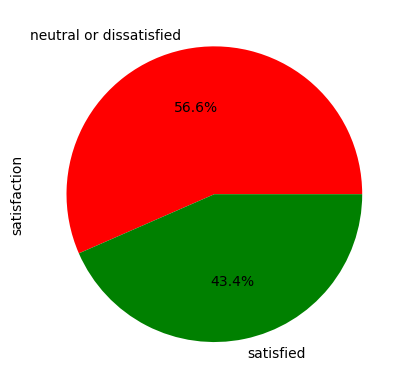

In [18]:
colors=['red','green']
df.satisfaction.value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%');

### Ouch! More than a half of the customers are unhappy with the service. 
Let's dive deeper.

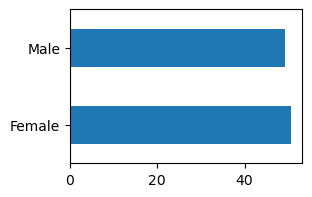

In [19]:
# Gender distribution, in percent

fig, ax = plt.subplots(figsize=(3, 2))
(df['Gender'].value_counts(normalize=True) * 100).plot(kind='barh', ax=ax);


Female and male distribution is almost 50/50.

In [20]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

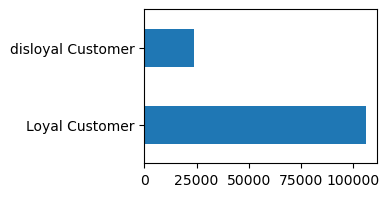

In [21]:
fig, ax = plt.subplots(figsize=(3, 2))
df['Customer Type'].value_counts().plot(kind='barh', ax=ax);

NOTE : There are almost 5 times more loyal customers than disloyal. Which is even more surprising, given the fact than a better half of them is unhappy about the service..

#### Check out for the correlation between type of travel, class and satisfaction:

In [22]:
tra_class = pd.DataFrame(df.groupby('Type of Travel')['satisfaction'].value_counts())
tra_class

satisfaction
Type of Travel  satisfaction                         
Business travel satisfied                       52356
                neutral or dissatisfied         37337
Personal Travel neutral or dissatisfied         36115
                satisfied                        4072

Business travellers are more often satisfied than personal Travellers.

- lets see can it maybe depend on a Travel class?

In [23]:
tr_class = pd.DataFrame(df.groupby('Class', as_index=False)['satisfaction'].value_counts())
tr_class

,Class,satisfaction,count
0,Business,satisfied,43166
1,Business,neutral or dissatisfied,18994
2,Eco,neutral or dissatisfied,47366
3,Eco,satisfied,10943
4,Eco Plus,neutral or dissatisfied,7092
5,Eco Plus,satisfied,2319


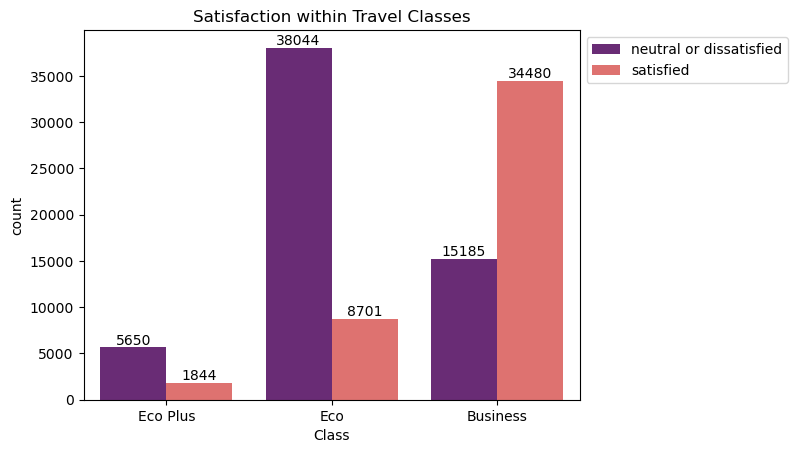

In [24]:
# Plotting

ax = sns.countplot(x = 'Class', hue = 'satisfaction', data = data, palette = 'magma', 
                   order = data['Class'].value_counts(ascending=True).index)

for label in ax.containers:
    ax.bar_label(label)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Satisfaction within Travel Classes')
plt.show()

And indeed, **yes it does depend on travel class**. Lowers the class, lowers the satisfaction. So what is so different within offer that makes such huge difference?

- Let's see what services customers appreciated the most:

In [25]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

- Identifying all services 

In [26]:
services = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].mean().sort_values(ascending=True)

In [27]:
srv = pd.DataFrame({'Services':services.index, 'Rate':services.values})
srv

,Services,Rate
0,Inflight wifi service,2.728696
1,Ease of Online booking,2.756876
2,Gate location,2.976925
3,Departure/Arrival time convenient,3.057599
4,Food and drink,3.204774
5,Online boarding,3.252633
6,Cleanliness,3.286326
7,Checkin service,3.306267
8,Leg room service,3.350878
9,Inflight entertainment,3.358077


- Lets visualize it 

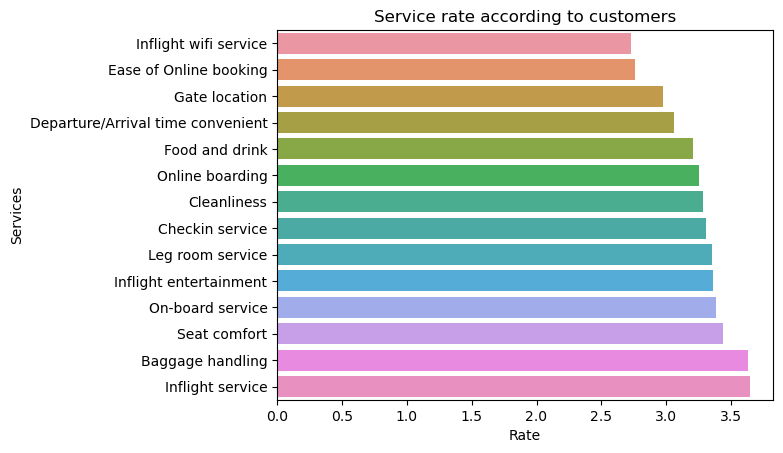

In [28]:
sns.barplot(data=srv, x="Rate", y="Services", orient='h');
plt.title('Service rate according to customers');

As per visualisation, **baggage handling** and **inflight service** are two aspects that received higher votes from passengers.

from internet : The term **inflight service** typically refers to the broader range of services available to passengers throughout the entire duration of the flight. This includes everything from boarding and pre-flight preparations to disembarkation at the destination. Inflight service encompasses various aspects such as cabin crew interactions, meal service, beverage service, entertainment systems, and any other services offered during the flight.

Many other services can be improved: ease of online booking, cleanliness, food and drink, departure/arrival time convenience

Some of them are easier to improve than the others.

**Let's see how the satisfaction level is affected by travel distance:**

Let's get the top 10 destinations by travellers quantity:

In [29]:
# Group by 'Flight Distance' and calculate the totals for 'Satisfaction' column

grouped_df = df.groupby('Flight Distance')['satisfaction'].value_counts().unstack().fillna(0)

In [30]:
# Sum the 'Satisfied' and 'Unsatisfied' columns to get the total quantity of 'Satisfaction'\

grouped_df['Total'] = (grouped_df['satisfied'] + grouped_df['neutral or dissatisfied']).astype(int)


# Get the top 10 values based on the total quantity of 'Satisfaction'
top_10_distances = grouped_df.nlargest(10, 'Total')
top_10_distances

satisfaction,neutral or dissatisfied,satisfied,Total
Flight Distance,,,
337,568.0,273.0,841
594,324.0,181.0,505
404,330.0,150.0,480
862,338.0,135.0,473
2475,278.0,192.0,470
447,296.0,161.0,457
236,300.0,138.0,438
192,279.0,145.0,424
308,248.0,154.0,402


- Lets Visualize This 

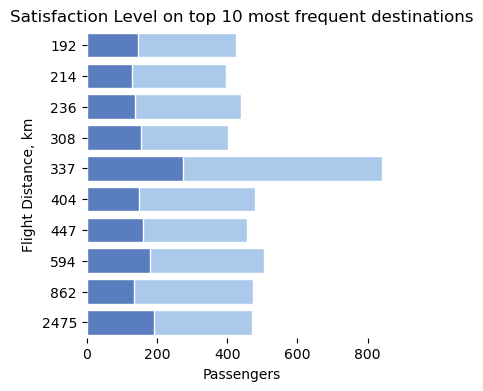

In [31]:
f, ax = plt.subplots(figsize=(4, 4))
sns.set_color_codes('pastel')
ax = sns.barplot( x='Total', y=top_10_distances.index, data=top_10_distances,
            label='Total passengers per destination', color='b', edgecolor='w',  orient = 'h')
sns.set_color_codes('muted')
sns.barplot( x='satisfied', y=top_10_distances.index, data=top_10_distances,
            label='Satisfied', color='b', edgecolor='w',  orient = 'h')

sns.despine(left=True, bottom=True)
plt.xlabel('Passengers')
plt.ylabel('Flight Distance, km')
plt.title('Satisfaction Level on top 10 most frequent destinations');

- No, happiness does not depend much on a distance travelled.

#### Age distribution

In [32]:
bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 34), (35, 54), (55, 100)])
ages = pd.DataFrame(pd.cut(df['Age'], bins).value_counts().sort_index())

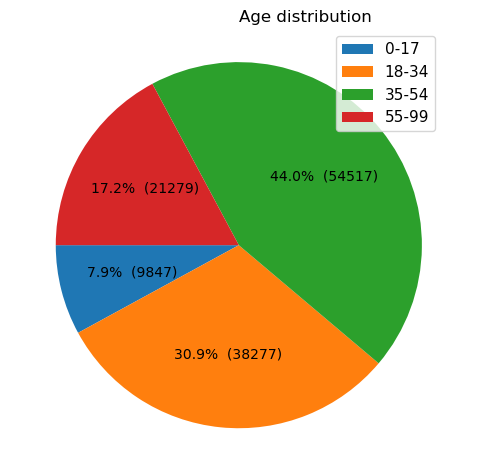

In [33]:
title = plt.title('Age distribution')
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(ages['Age'], autopct=lambda p : '{:.1f}%  ({:.0f})'.format(p,p * sum(ages['Age'])/100), startangle=180)
labels=["0-17", "18-34", "35-54", "55-99"]
plt.legend(pie[0],labels, bbox_to_anchor=(0.7,0.7), loc="lower right", fontsize=11, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.45)
plt.tight_layout()

Minor are least present in our data, mainly middle-aged people are there followed by youngster.

- Let's dive deeper and discover how satisfaction is distributed across the age groups.

In [34]:
# Create a new column "Age_range" vith values from 'Age' column


condlist = [df['Age'].between(0,18), df['Age'].between(19,34), df['Age'].between(35,54), df['Age'].between(55,100)]
choicelist = ['minor', '18-34', '35-54', '55-100']

df['Age_range'] = np.select(condlist, choicelist)

Lets visualize it 

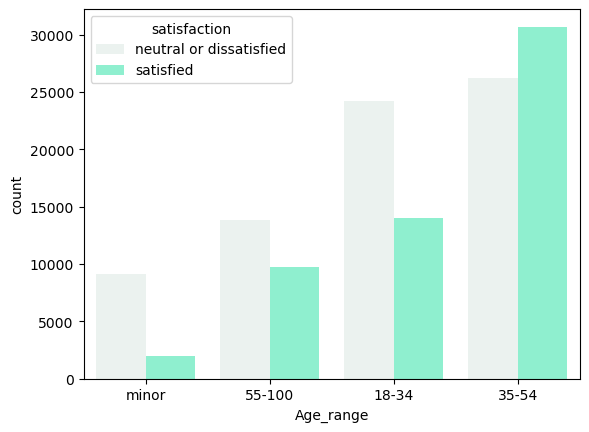

In [35]:

sns.countplot(data=df, x='Age_range', hue='satisfaction', color='aquamarine', #aquamrine 
              order = df['Age_range'].value_counts(ascending=True).index)
plt.show()


As per now, there are no many obvious traits to detect the satisfaction by age other than minors nothing specific can be told.<br>   We discovered that Business class passengers are mainly happy, meanwhile there are no other obvious correlations. 

-- Let's see does gender has anything to do with satisfaction  

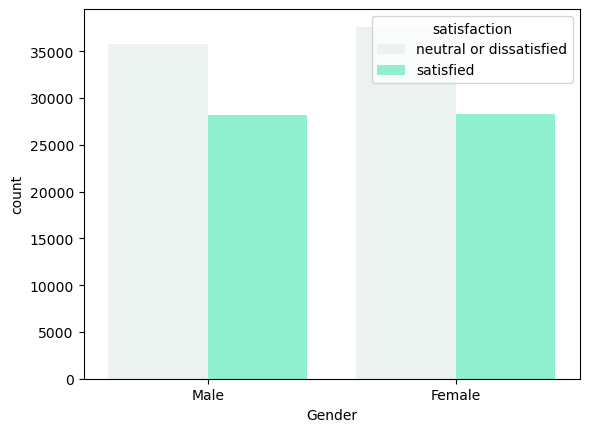

In [36]:
sns.countplot(data=df, x='Gender', hue='satisfaction', color='aquamarine') #aquamrine 

plt.show()

**Nope gender are indifferent with satisfication, nothing can be drawn out of it** 

- lets build our machine learning model now -

# 3. Encoding

Drop the columns with features on which flight company can not influence directly.

In [37]:
df_final = df.drop(['Gender', 'Age_range', 'Class', 'Type of Travel', 'Customer Type'], axis=1)

In [38]:
df_final['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                129880 non-null  int64
 1   Flight Distance                    129880 non-null  int64
 2   Inflight wifi service              129880 non-null  int64
 3   Departure/Arrival time convenient  129880 non-null  int64
 4   Ease of Online booking             129880 non-null  int64
 5   Gate location                      129880 non-null  int64
 6   Food and drink                     129880 non-null  int64
 7   Online boarding                    129880 non-null  int64
 8   Seat comfort                       129880 non-null  int64
 9   Inflight entertainment             129880 non-null  int64
 10  On-board service                   129880 non-null  int64
 11  Leg room service                   129880 non-null  int64
 12  Bag

In [40]:
# Defining X and y


X = df_final.drop('satisfaction', axis = 1)
y = df_final['satisfaction']

In [41]:
# Subdivision of the dataset onto train, validation and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=20000, random_state=42)

In [42]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((89880, 18), (20000, 18), (20000, 18), (89880,), (20000,), (20000,))

Now as we have the dataset divided on **train** (X_train, y_train),    **validation** (X_val, y_val) and    **test** (X_test, y_test)
we can train different models.

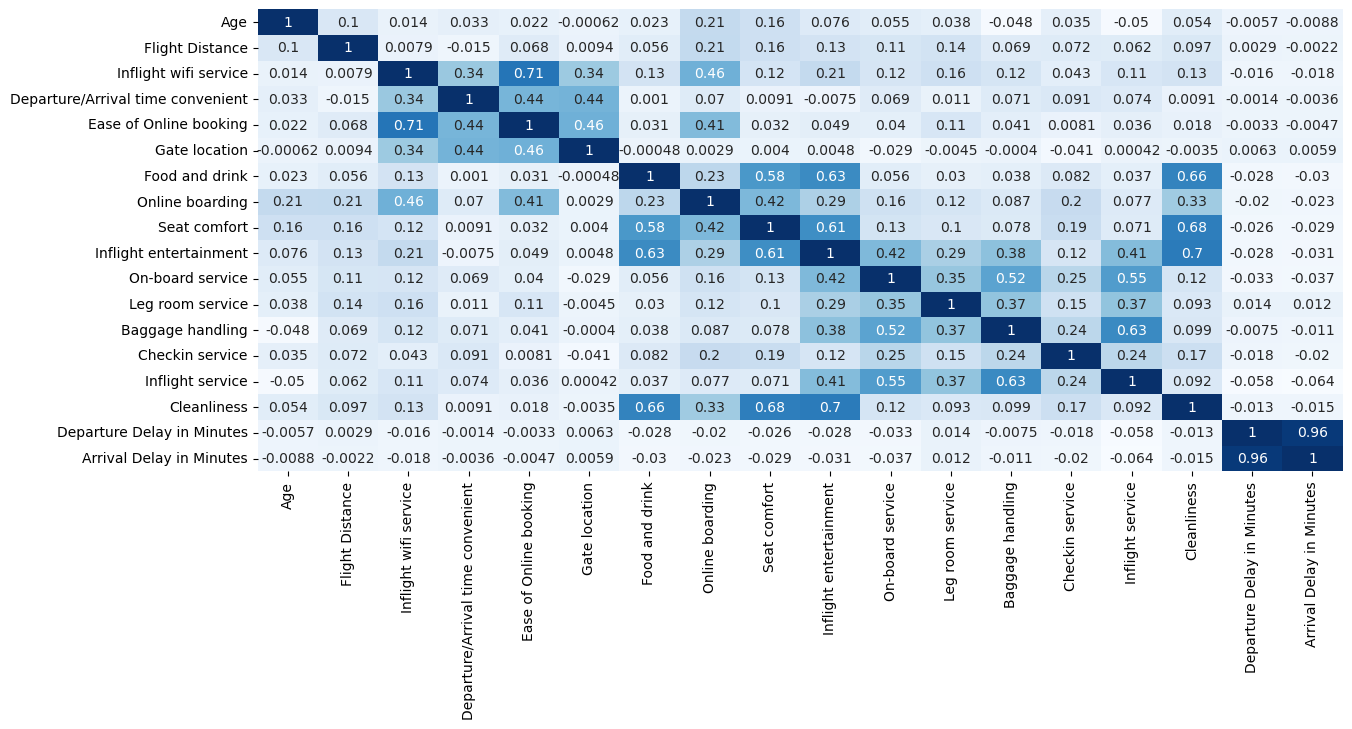

In [43]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

In [44]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 4. Model implementation

Our prediction problem, either a customer is satisfied or not, is a binary classification problem, therefore we will handle it with different Classifiers. <br><br>
*Metrics of model evaluation:* in this case the appropriate metrics are Precision and Accuracy.<br><br>
**Precision** because we deal with the business problem where the instance, falsely categorised as positive, has way greater business loss than that of an actual positive falsely labelled as negative.<br>
**Accuracy** is also a good metric in this case because classes are well-balanced and yes, it is important to see how model correctly assigns labels overall, both negatives and positives.

Let's build a few models, and based on its' performance choose two best. Then tune its' hyperparameters for better performance and unite them with Ensemble method in one model.

#### 1. Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_dt)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11257
           1       0.91      0.92      0.91      8743

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [46]:
acc_dt = accuracy_score(y_val, y_pred_dt)
print(f"Accuracy Score DecisionTreeClassifier: {acc_dt:.4f}")

Accuracy Score DecisionTreeClassifier: 0.9242


#### 2. K-Nearest Neighbor

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_knn)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.78     11257
           1       0.72      0.66      0.69      8743

    accuracy                           0.74     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.74      0.74      0.74     20000



In [48]:
acc_knn = accuracy_score(y_val, y_pred_knn)
print(f"Accuracy Score KNN Classifier: {acc_knn:.4f}")

Accuracy Score KNN Classifier: 0.7385


In [49]:
#print(f"KNN Train accuracy is {knn.score(X_train, y_train):.2f}")

In [50]:
#print(f"KNN Validation accuracy is {knn.score(X_val, y_val):.2f}")

#### 3. Random Forest Classifier

In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = rf.predict(X_val)

#### RandomForest model evaluation

In [54]:
print(f'Classification report: \n{classification_report(y_val, y_pred_rf)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [55]:
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy Score RandomForest: {acc_rf:.4f}")

Accuracy Score RandomForest: 0.9484


In [56]:
print(f"Random Forest Train accuracy is {rf.score(X_train, y_train):.2f}")

Random Forest Train accuracy is 1.00


In [57]:
print(f"Random Forest Validation accuracy is {rf.score(X_val, y_val):.2f}")

Random Forest Validation accuracy is 0.95


We can see that there is a slight overfit by comparing train and val accuracy.

#### 4. XGBoost Classifier

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

#### XGBoost model evaluation

In [59]:
print(f'Classification report: \n{classification_report(y_val, y_pred_xgb)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [60]:
print(f"Train accuracy XGBoost is {xgb.score(X_train, y_train):.2f}")
print(f"Validation accuracy XGBoost is {xgb.score(X_val, y_val):.2f}") 

Train accuracy XGBoost is 0.96
Validation accuracy XGBoost is 0.95


In [61]:
acc_xg = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy Score XGBoost: {acc_xg:.4f}")

Accuracy Score XGBoost: 0.9506


Almost no overfitting! Great.

#### 5. CatBoost Classifier

In [62]:
%%time
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
y_pred_cb = catb.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_cb)}')

Learning rate set to 0.070331
0:	learn: 0.6174000	total: 161ms	remaining: 2m 41s
1:	learn: 0.5477159	total: 171ms	remaining: 1m 25s
2:	learn: 0.4982671	total: 181ms	remaining: 1m
3:	learn: 0.4581907	total: 192ms	remaining: 47.8s
4:	learn: 0.4210182	total: 202ms	remaining: 40.3s
5:	learn: 0.3962878	total: 213ms	remaining: 35.3s
6:	learn: 0.3765642	total: 224ms	remaining: 31.8s
7:	learn: 0.3514819	total: 236ms	remaining: 29.3s
8:	learn: 0.3360558	total: 248ms	remaining: 27.3s
9:	learn: 0.3220249	total: 259ms	remaining: 25.6s
10:	learn: 0.3114381	total: 270ms	remaining: 24.3s
11:	learn: 0.3022757	total: 281ms	remaining: 23.1s
12:	learn: 0.2944803	total: 293ms	remaining: 22.2s
13:	learn: 0.2868709	total: 304ms	remaining: 21.4s
14:	learn: 0.2768991	total: 316ms	remaining: 20.7s
15:	learn: 0.2698268	total: 327ms	remaining: 20.1s
16:	learn: 0.2645756	total: 337ms	remaining: 19.5s
17:	learn: 0.2607109	total: 348ms	remaining: 19s
18:	learn: 0.2553352	total: 359ms	remaining: 18.5s
19:	learn: 0.2

169:	learn: 0.1351333	total: 2.01s	remaining: 9.81s
170:	learn: 0.1348816	total: 2.02s	remaining: 9.79s
171:	learn: 0.1347252	total: 2.03s	remaining: 9.78s
172:	learn: 0.1346587	total: 2.04s	remaining: 9.76s
173:	learn: 0.1344518	total: 2.05s	remaining: 9.74s
174:	learn: 0.1344206	total: 2.06s	remaining: 9.73s
175:	learn: 0.1341904	total: 2.07s	remaining: 9.71s
176:	learn: 0.1341104	total: 2.08s	remaining: 9.69s
177:	learn: 0.1339454	total: 2.09s	remaining: 9.67s
178:	learn: 0.1337560	total: 2.1s	remaining: 9.65s
179:	learn: 0.1335571	total: 2.11s	remaining: 9.63s
180:	learn: 0.1333815	total: 2.12s	remaining: 9.61s
181:	learn: 0.1332228	total: 2.14s	remaining: 9.61s
182:	learn: 0.1331517	total: 2.15s	remaining: 9.6s
183:	learn: 0.1329221	total: 2.16s	remaining: 9.58s
184:	learn: 0.1327729	total: 2.17s	remaining: 9.56s
185:	learn: 0.1325935	total: 2.18s	remaining: 9.55s
186:	learn: 0.1324779	total: 2.19s	remaining: 9.54s
187:	learn: 0.1322156	total: 2.21s	remaining: 9.52s
188:	learn: 0.

333:	learn: 0.1147989	total: 3.86s	remaining: 7.7s
334:	learn: 0.1147567	total: 3.87s	remaining: 7.69s
335:	learn: 0.1147083	total: 3.88s	remaining: 7.68s
336:	learn: 0.1146176	total: 3.9s	remaining: 7.67s
337:	learn: 0.1144319	total: 3.9s	remaining: 7.65s
338:	learn: 0.1142857	total: 3.92s	remaining: 7.63s
339:	learn: 0.1142278	total: 3.93s	remaining: 7.62s
340:	learn: 0.1141473	total: 3.94s	remaining: 7.61s
341:	learn: 0.1140320	total: 3.95s	remaining: 7.6s
342:	learn: 0.1139367	total: 3.96s	remaining: 7.58s
343:	learn: 0.1139066	total: 3.97s	remaining: 7.57s
344:	learn: 0.1138615	total: 3.98s	remaining: 7.56s
345:	learn: 0.1137833	total: 3.99s	remaining: 7.55s
346:	learn: 0.1137463	total: 4s	remaining: 7.53s
347:	learn: 0.1136354	total: 4.01s	remaining: 7.52s
348:	learn: 0.1135826	total: 4.03s	remaining: 7.51s
349:	learn: 0.1135311	total: 4.04s	remaining: 7.5s
350:	learn: 0.1134567	total: 4.05s	remaining: 7.48s
351:	learn: 0.1133175	total: 4.06s	remaining: 7.47s
352:	learn: 0.113185

504:	learn: 0.1050263	total: 5.74s	remaining: 5.63s
505:	learn: 0.1049828	total: 5.76s	remaining: 5.62s
506:	learn: 0.1049224	total: 5.77s	remaining: 5.61s
507:	learn: 0.1048540	total: 5.78s	remaining: 5.6s
508:	learn: 0.1048035	total: 5.79s	remaining: 5.58s
509:	learn: 0.1047052	total: 5.8s	remaining: 5.57s
510:	learn: 0.1046724	total: 5.81s	remaining: 5.56s
511:	learn: 0.1046217	total: 5.82s	remaining: 5.55s
512:	learn: 0.1046065	total: 5.83s	remaining: 5.53s
513:	learn: 0.1045783	total: 5.84s	remaining: 5.52s
514:	learn: 0.1045367	total: 5.85s	remaining: 5.51s
515:	learn: 0.1044962	total: 5.86s	remaining: 5.5s
516:	learn: 0.1044719	total: 5.87s	remaining: 5.49s
517:	learn: 0.1044527	total: 5.88s	remaining: 5.47s
518:	learn: 0.1043896	total: 5.89s	remaining: 5.46s
519:	learn: 0.1043197	total: 5.9s	remaining: 5.45s
520:	learn: 0.1042558	total: 5.91s	remaining: 5.43s
521:	learn: 0.1042201	total: 5.92s	remaining: 5.42s
522:	learn: 0.1041738	total: 5.93s	remaining: 5.41s
523:	learn: 0.10

680:	learn: 0.0976929	total: 7.66s	remaining: 3.59s
681:	learn: 0.0976704	total: 7.67s	remaining: 3.58s
682:	learn: 0.0976106	total: 7.68s	remaining: 3.56s
683:	learn: 0.0975951	total: 7.69s	remaining: 3.55s
684:	learn: 0.0975806	total: 7.71s	remaining: 3.54s
685:	learn: 0.0975386	total: 7.72s	remaining: 3.53s
686:	learn: 0.0974915	total: 7.73s	remaining: 3.52s
687:	learn: 0.0974843	total: 7.74s	remaining: 3.51s
688:	learn: 0.0974703	total: 7.75s	remaining: 3.5s
689:	learn: 0.0974554	total: 7.76s	remaining: 3.49s
690:	learn: 0.0974015	total: 7.77s	remaining: 3.48s
691:	learn: 0.0973338	total: 7.78s	remaining: 3.46s
692:	learn: 0.0972952	total: 7.79s	remaining: 3.45s
693:	learn: 0.0972659	total: 7.8s	remaining: 3.44s
694:	learn: 0.0972377	total: 7.81s	remaining: 3.43s
695:	learn: 0.0972279	total: 7.83s	remaining: 3.42s
696:	learn: 0.0972213	total: 7.84s	remaining: 3.41s
697:	learn: 0.0971909	total: 7.85s	remaining: 3.4s
698:	learn: 0.0971814	total: 7.86s	remaining: 3.38s
699:	learn: 0.0

849:	learn: 0.0924772	total: 9.49s	remaining: 1.67s
850:	learn: 0.0924375	total: 9.5s	remaining: 1.66s
851:	learn: 0.0924117	total: 9.51s	remaining: 1.65s
852:	learn: 0.0923944	total: 9.52s	remaining: 1.64s
853:	learn: 0.0923688	total: 9.53s	remaining: 1.63s
854:	learn: 0.0923164	total: 9.54s	remaining: 1.62s
855:	learn: 0.0922971	total: 9.55s	remaining: 1.61s
856:	learn: 0.0922436	total: 9.56s	remaining: 1.59s
857:	learn: 0.0922083	total: 9.57s	remaining: 1.58s
858:	learn: 0.0921842	total: 9.58s	remaining: 1.57s
859:	learn: 0.0921691	total: 9.59s	remaining: 1.56s
860:	learn: 0.0921407	total: 9.61s	remaining: 1.55s
861:	learn: 0.0920649	total: 9.62s	remaining: 1.54s
862:	learn: 0.0920385	total: 9.63s	remaining: 1.53s
863:	learn: 0.0919953	total: 9.64s	remaining: 1.52s
864:	learn: 0.0919845	total: 9.65s	remaining: 1.5s
865:	learn: 0.0919166	total: 9.66s	remaining: 1.49s
866:	learn: 0.0919025	total: 9.67s	remaining: 1.48s
867:	learn: 0.0918195	total: 9.68s	remaining: 1.47s
868:	learn: 0.

In [63]:
acc_cb = accuracy_score(y_val, y_pred_cb)
print(f"Accuracy Score CatBoost: {acc_cb:.4f}")

Accuracy Score CatBoost: 0.9529


In [64]:
print(f"CatBoost Train accuracy is {catb.score(X_train, y_train):.2f}")
print(f"CatBoost Validation accuracy is {catb.score(X_val, y_val):.2f}")

CatBoost Train accuracy is 0.97
CatBoost Validation accuracy is 0.95


Almost no overfitting here as well.

# 5. Hyperparameters tuning

We'll select models with the best performance, and then tune their hyperparameters before passing models to an Ensemble algorithm.

Lets see with **RandomForest first.** 


Despite there is no evident overfitting for CatBoost and XGBoost, we will try fine-tune hyperparameters to capture better the underlying patterns in the data, which will definitely result in better performance on unseen data.

### RandomForest RandomSearch

RandomSearch is a technique used for hyperparameters optimisation. It randomly samples a subset of hyperparameter combinations from a given search space.

In [65]:
%%time
# Define the parameter grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
} 

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
#EXECUTION TIME: 15'

# Create a Random Forest Classifier
rf_tuned = RandomForestClassifier()

# Init Random Search
rnd_cv = RandomizedSearchCV(rf_tuned, param_grid, n_jobs=-1, cv=7, scoring="accuracy")

# Fit the model
rnd_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='accuracy')

In [67]:
y_pred_rf_cv = rnd_cv.predict(X_val)
best_rf = rnd_cv.best_estimator_

In [68]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv.best_params_)
print("Best Score:", rnd_cv.best_score_)
print(f'Classification report: \n{classification_report(y_val, y_pred_rf_cv)}')

Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': False}
Best Score: 0.9497886070315978
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [69]:
acc_rf_cv = accuracy_score(y_val, y_pred_rf_cv)
print(f"Accuracy Score RandomForest Tuned: {acc_rf_cv:.4f}")

Accuracy Score RandomForest Tuned: 0.9515


We can observe that preformance of the RandomForest model has a very slight improvement after hyperparameters tuning 🤔 

- LOOKS GOOD WE'HAVE GOT GOOD RESULT :)) 

Note :- We can do hyperperameter tuning using random_search on Catboost & XGboost too.

Thanks Reader !